In [10]:
!pip install pandas numpy matplotlib seaborn scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [14]:
# Step 1: Data Review and Cleaning

# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Load the dataset into a Pandas DataFrame (make sure path is correct)
df = pd.read_csv('cleaned_credit_card.csv')

# Display the first few rows of the dataset
df.head()

# Data overview
df.info()

# Check for missing values
print(f"Missing values:\n{df.isnull().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [12]:
# Step 2: Data Cleaning (remove duplicates, check data types, handle missing data)
# Check for duplicate records
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Removing duplicates
df.drop_duplicates(inplace=True)

Number of duplicate rows: 1081


In [16]:
print(df.columns)     # Check Columns name


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


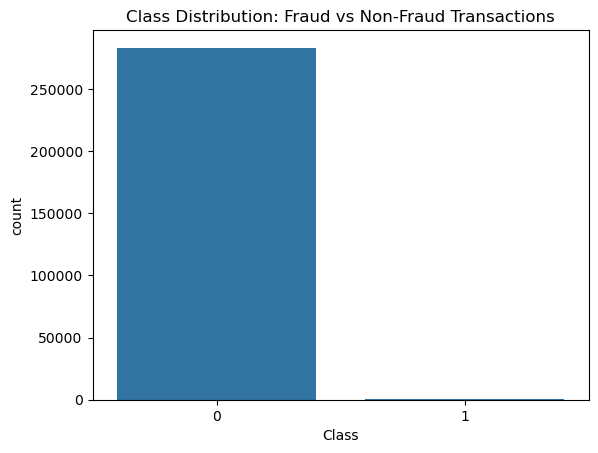

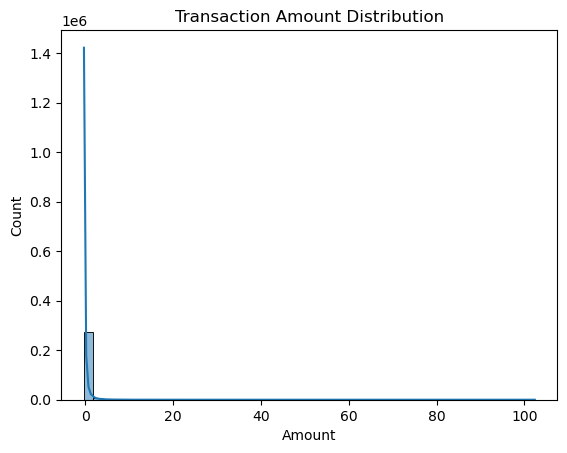

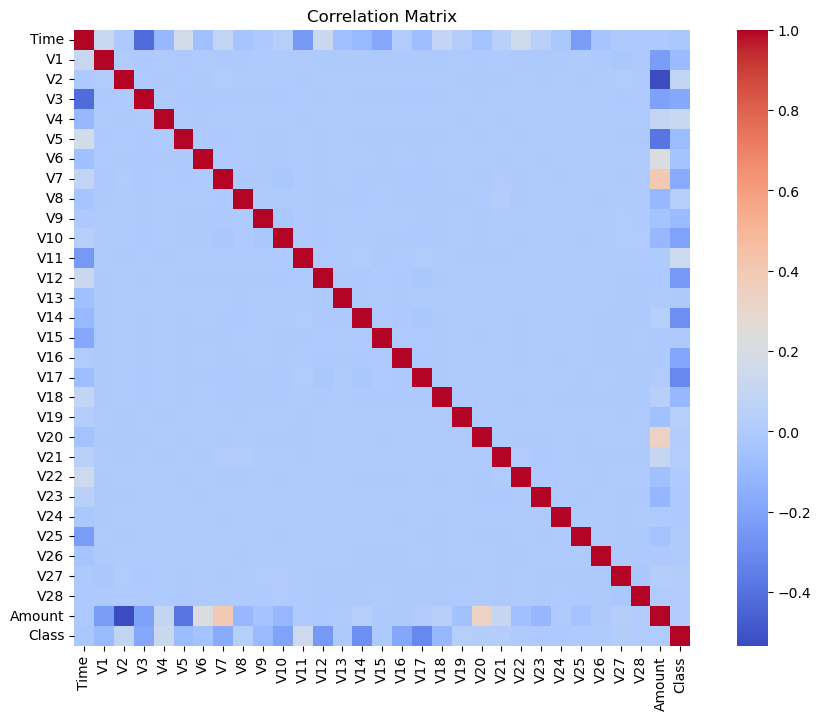

In [13]:
# Step 3: Exploratory Data Analysis (EDA)
# Class distribution (fraud vs non-fraud)
sns.countplot(x='Class', data=df)
plt.title('Class Distribution: Fraud vs Non-Fraud Transactions')
plt.show()

# Transaction amount distribution
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Transaction Amount Distribution')
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [18]:
# Step 4: Preprocessing (scaling)
# Define the features and target
X = df.drop(['Class'], axis=1)
y = df['Class']

# Scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

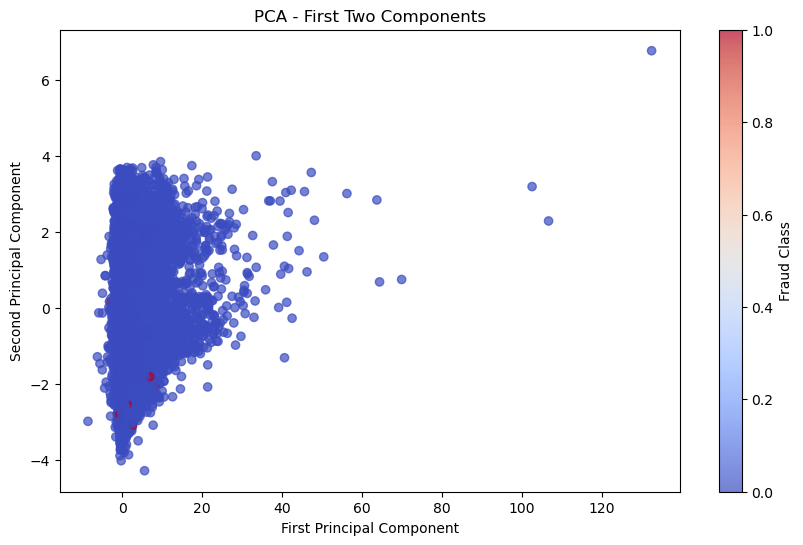

In [19]:
# Step 5: Principal Component Analysis (PCA)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.7)
plt.title('PCA - First Two Components')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(label='Fraud Class')
plt.show()

In [1]:
# Step 6: Model Development
# Split the data into training and testing sets
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)

try:
    log_reg.fit(X_train, y_train)
except Exception as e:
    print(f"Error fitting Logistic Regression: {e}")


NameError: name 'X_scaled' is not defined

In [ ]:
# Step 7: Model Evaluation
# Logistic Regression Evaluation
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_log_reg)}")

# Random Forest Evaluation
y_pred_rf = rf.predict(X_test)
print("Random Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_rf)}")

# Gradient Boosting Evaluation
y_pred_gbc = gbc.predict(X_test)
print("Gradient Boosting Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gbc)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_gbc)}")

# Confusion Matrix for Logistic Regression
conf_matrix = confusion_matrix(y_test, y_pred_log_reg)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ROC Curve and AUC for Random Forest
y_pred_proba = rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
# Step 8: Hyperparameter Tuning with GridSearchCV (Example for Random Forest)
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)